# FUNMAN Dec 8 2022 Demo
- This notebook demonstrates using FUNMAN to synthesize parameters for two scenarios. 
    - Models: The notebook uses three bilayer models: 
        - SIR+H: SIR extended with a hospitalization measurement variable H.
        - SVIIR: SIR extended with a hospitalization measurement variable H.
        - Bucky: Original Bucky bilayer
    - Scenario 1: compares the reduction in transmissibility needed to avoid exceeding hospital capacity.  It includes three possible interventions:
        - Intervention 0: No reduction in transmissibility as a baseline
        - Intervention 1: Reduce transmissibility by a factor of 0.05
        - Intervention 2: Identify a range on the transmissiblity reduction needed to avoid exceeding hospital capacity if the intervention is delayed from the start of the scenario.
    - Scenario 2: uses the SVIIR model (the only model which includes a vaccination rate) to identify a range on the vaccination rate that will avoid exceeding a threshold on the number of infections.
- The notebook makes use of the `funman_demo.example.demo120822`, which includes many utilities used to drive this demonstration notebook.

In [1]:
%load_ext autoreload
%autoreload 2
from funman_demo.example.demo120822 import Scenario1, Scenario2
from IPython.display import Markdown as md
from IPython.display import Image, display
import os

In [2]:
# Scenario 1 models
scenario1 = Scenario1()
models = scenario1.models["intervention1"]
scenario1.to_md(scenario1.models["intervention1"])

# Bilayer and Measurement Model
SIR Bilayer (left), Hospitalized Measurement (right)

![](SIR+H_bilayer.png) ![](SIR+H_measurement.png)
# Initial State (population 10000)
- ## R: 1
- ## S: 9998
- ## I: 1
# Parameter Bounds
- ## hr: [0.01, 0.01]
- ## beta: [6.7e-05, 6.7e-05]
- ## gamma: [0.07142857142857142, 0.07142857142857142]
# Scenario Configuration
- ## step_size: 1
- ## query_threshold: 50
- ## duration: 20
- ## query_variable: H
# Query
- ## $\bigwedge\limits_{t \in [0,20]} H_t \leq50$
---

# Bilayer and Measurement Model
SIR Bilayer (left), Hospitalized Measurement (right)

![](SVIIR_bilayer.png) ![](SVIIR_measurement.png)
# Initial State (population 10000)
- ## V: 1
- ## S: 10000
- ## I_v: 1
- ## R: 1
- ## I: 1
# Parameter Bounds
- ## gamma_2: [0.07142857142857142, 0.07142857142857142]
- ## v_r: [0.001, 0.001]
- ## gamma_1: [0.07142857142857142, 0.07142857142857142]
- ## beta_2: [6.7e-05, 6.7e-05]
- ## hr_1: [0.01, 0.01]
- ## v_s1: [6.7e-05, 6.7e-05]
- ## v_s2: [6.7e-05, 6.7e-05]
- ## hr_2: [0.01, 0.01]
- ## beta_1: [6.7e-05, 6.7e-05]
# Scenario Configuration
- ## step_size: 1
- ## query_threshold: 50
- ## duration: 20
- ## query_variable: H
# Query
- ## $\bigwedge\limits_{t \in [0,20]} H_t \leq50$
---

# Bilayer and Measurement Model
SIR Bilayer (left), Hospitalized Measurement (right)

![](Bucky_bilayer.png) ![](Bucky_measurement.png)
# Initial State (population 10000)
- ## I_crit: 1
- ## S: 10000
- ## I_asym: 1
- ## I_mild: 1
- ## R: 1
- ## R_hosp: 1
- ## E: 100
- ## D: 0
# Parameter Bounds
- ## gamma_2: [0.07142857142857142, 0.07142857142857142]
- ## theta: [0.03333333333333333, 0.03333333333333333]
- ## gamma_h: [0.07142857142857142, 0.07142857142857142]
- ## beta_2: [6.7e-05, 6.7e-05]
- ## gamma_1: [0.07142857142857142, 0.07142857142857142]
- ## hr: [1.0, 1.0]
- ## sigma: [0.01, 0.01]
- ## delta_1: [3.3e-05, 3.3e-05]
- ## delta_4: [0.0056, 0.0056]
- ## delta_3: [0.001, 0.001]
- ## delta_2: [0.01, 0.01]
- ## beta_1: [6.7e-05, 6.7e-05]
# Scenario Configuration
- ## step_size: 1
- ## query_threshold: 50
- ## duration: 20
- ## query_variable: H
# Query
- ## $\bigwedge\limits_{t \in [0,20]} H_t \leq50$
---


# Scenario 1
Synthesize Transmissibility Rate Reduction needed to cause hospitalizations to avoid exceeding a threshold

In [1]:
# Setup 

duration = 20               # number of days
step_size = 1               # analysis steps size in number of days
hospital_capacity = 50      # threshold for the number of hospitalizations

Analyzing Model: SIR+H ...
Analyzing Model: SVIIR ...
Analyzing Model: Bucky ...


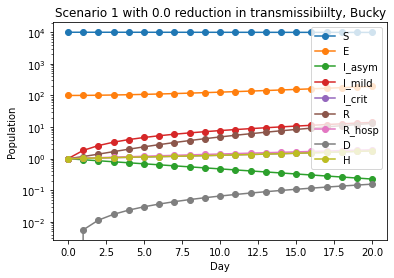

SIR+H: Query Not Satisfied
SVIIR: Query Not Satisfied
Bucky: Query Satisfied


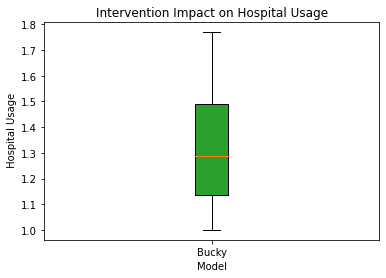

In [4]:
# 0. No intervention. Will H_t <= hospital_capacity forall t?

transmissibility_reduction = 0.0

# Create and Evaluate Scenario and Intervention
scenario1_i0 = Scenario1(duration=duration, query_threshold=hospital_capacity, step_size=step_size)
results1_i0 = scenario1_i0.analyze_intervention_1(transmissibility_reduction, models=models)

# Output Results
print("\n".join([r["message"] for n, r in results1_i0.items()]))
scenario1_i0.compare_model_results(results1_i0)

Analyzing Model: SIR+H ...


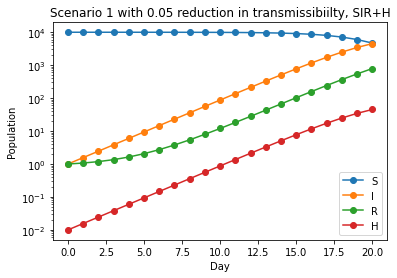

Analyzing Model: SVIIR ...
Analyzing Model: Bucky ...


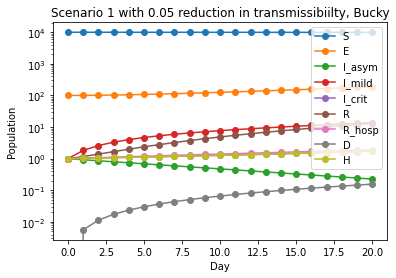

SIR+H: Query Satisfied
SVIIR: Query Not Satisfied
Bucky: Query Satisfied


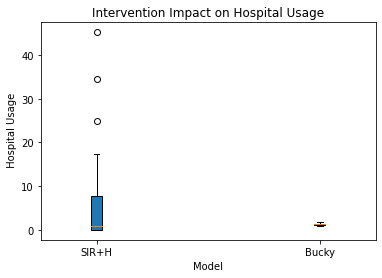

In [5]:
# 1. Intervene with 0.05 reduction in transmissibility.  Will H_t <= hospital_capacity forall t?

transmissibility_reduction = 0.05

# Create and Evaluate Scenario and Intervention
scenario1_i1 = Scenario1(duration=duration, query_threshold=hospital_capacity, step_size=step_size)
results1_i1 = scenario1_i1.analyze_intervention_1(transmissibility_reduction, models=models)

# Output Results
print("\n".join([r["message"] for n, r in results1_i1.items()]))
scenario1_i1.compare_model_results(results1_i1)

Analyzing Model: SIR+H ...


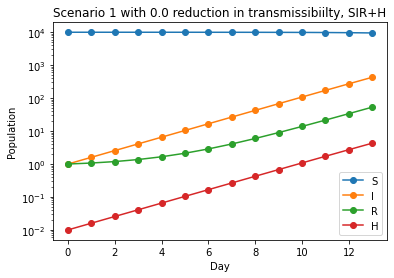

Analyzing Model: SVIIR ...


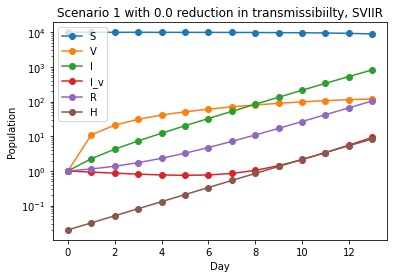

Analyzing Model: Bucky ...


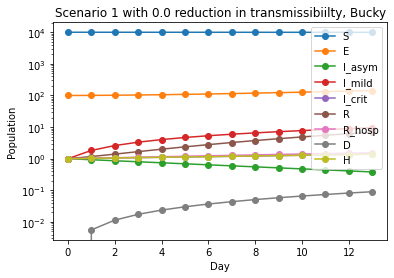

In [6]:
# Intervention 2 is over a shorter time period, with different initial conditions

# What are S, I, and R at start of intervention? (used for parameter synthesis below)

start_day = duration-7
scenario1_i2pre = Scenario1(duration=start_day, step_size=step_size, query_threshold=hospital_capacity)
transmissibility_reduction = 0.0
results1_i2pre = scenario1_i2pre.analyze_intervention_1(transmissibility_reduction, models=models)

Starting initializing dynamics of model
Initialized dynamics of model
--- False(dict_values([[4.69e-05, 8.04e-05]]))


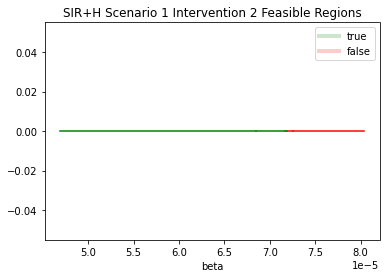

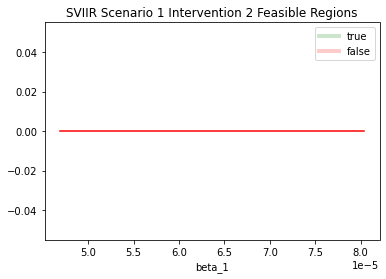

In [7]:
# Plug in state values, and compute reduction in transmissibility needed to avoid exceeding hospital capacity
# Set the interval to consider as 0.05 +- 0.25
# Data Product: Feasible parameter range

scenario1_i2 = Scenario1(duration=6, query_threshold=hospital_capacity, step_size=step_size)
init_values={ model_name : { k: results1_i2pre[model_name]["dataframe"].loc[start_day][k] 
                             for k in model.init_values.keys() } 
              for model_name, model in scenario1_i2.models["intervention2"].items() if model_name in models }
margin=0.25
results1_i2 = scenario1_i2.analyze_intervention_2([0.05-margin, 0.05+margin], models=models, init_values=init_values)


<AxesSubplot:title={'center':'Intervention Impact on Hospital Usage '}, xlabel='Reduction in Transmissibility', ylabel=' Hospital Usage'>

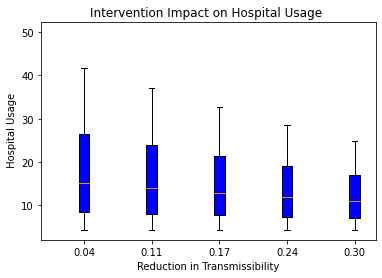

In [9]:
# Extract and evaluate multiple points from parameter space 
# Plot hospital usage as a function of the reduction in transmissibility
# Data product: Parameter quality metric

points = scenario1_i2.extract_true_points(results1_i2, {"SIR+H": "beta", "SVIIR": "beta_1", "Bucky": "beta_1"}, num_points=5)
scenario1_i2.plot_points(points, width=.01)

<!-- (:process infection
 :parameters (?gamma)
 :precondition (and)
 :effect (and 
            (increase (I) (function1))
            (increase (R) (function2))
            (increase (S) (function3))
            )
 )

 (:durative-action mandate
  :parameters ()
  :duraiton (?duration)
  :precondition (and)
  :effect (and (at-start (increase (beta) (function1))
                (at-end (decrease (beta) (function1))))
  )

  (:event infected-threshold
   :precondtion (>= I 1000)
   :effect (fail)
   ) -->

# Scenario 2
Synthesize Vaccination Rate to Cause Infected to fall below a threshold by end

Starting initializing dynamics of model
Initialized dynamics of model
Split(dict_values([[-0.009000000000000001, 0.011]]))
+++ True(dict_values([[0.004267686344428364, 0.011]]))
Split(dict_values([[-0.009000000000000001, 0.004267686344428364]]))
Split(dict_values([[0.0011061833170509672, 0.004267686344428364]]))
--- False(dict_values([[-0.009000000000000001, 0.0011061833170509672]]))
Split(dict_values([[0.0028689679665669095, 0.004267686344428364]]))
--- False(dict_values([[0.0011061833170509672, 0.0028689679665669095]]))
+++ True(dict_values([[0.003262145199065234, 0.004267686344428364]]))
Split(dict_values([[0.0028689679665669095, 0.003262145199065234]]))
+++ True(dict_values([[0.0030037411611880485, 0.003262145199065234]]))
Split(dict_values([[0.0028689679665669095, 0.0030037411611880485]]))
Split(dict_values([[0.002928715099840334, 0.0030037411611880485]]))
--- False(dict_values([[0.0028689679665669095, 0.002928715099840334]]))
+++ True(dict_values([[0.0029509209821760828, 0.003003

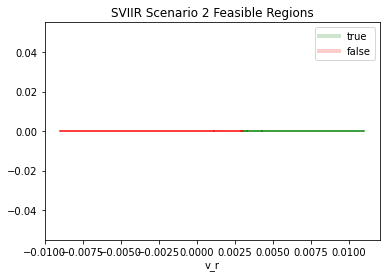

In [10]:
margin=10.0 # Allow a 10% (dec/inc)rease in the rate of vaccination v_r
# margin = 1.0
infected_threshold=20

scenario2 = Scenario2(duration=5, query_threshold=infected_threshold, step_size=step_size)
results2 = scenario2.analyze_intervention_vaccination([-margin, margin])

<AxesSubplot:title={'center':'Vaccination Rate impact upon Infections'}, xlabel='Vaccination Rate (v_r)', ylabel='Infections'>

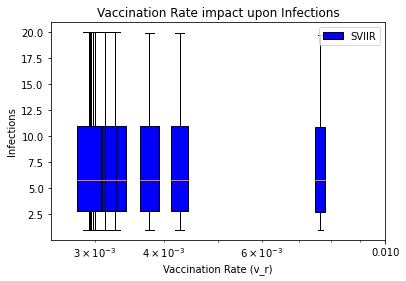

In [11]:
points2 = scenario2.extract_true_points(results2, {"SIR+H": "v_r", "SVIIR": "v_r", "Bucky": "v_r"}, num_points=2)
scenario2.plot_points(points2, width=.0003)